In [ ]:
#polynomial regression
# we step into multidimensional problems, we expand the coefficients, 
#by tuning hyperparameter, the degree of polynomial

#putting hyperparameter into the picture,
#tuning it is important ,
#too large leads overfitting
#too small leads underfitting

#A model that expresses the relationship between the predicted outcome
#and the predictor variable(s) as a polynomial function is called a Polynomial Model. 
#A Polynomial Model involving one predictor variable is called a univariate Polynomial Model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#random non-linear data
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

X_sorted = np.sort(X, axis=0)
y_sorted = y[np.argsort(X, axis=0).ravel()]
import matplotlib.pyplot as plt
#plot 
plt.scatter(X_sorted,y_sorted)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='g')

plt.scatter(X_sorted,y_sorted)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#applying polynomial linear regression degree=2
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [ ]:
print(X_train[0])
print(X_train_trans[0])

In [ ]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)


In [ ]:
y_pred=lr.predict(X_test_trans)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
lr.coef_

In [ ]:
#the coefficients are decreasing, influencing the x_train

In [ ]:
lr.intercept_

In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
#how change in degree influence change in predictions
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

In [ ]:
polynomial_regression(10)

In [ ]:
#the model is trying to reduce bias, and is increasing variance.
polynomial_regression(50)

In [ ]:
# the waves touching training data means the model is becoming more likely a crammer, memorizing the patterns not learning from them.
# the model performs outstanding on training data, but fails badly to predict on test data

In [ ]:
poly.powers_

In [ ]:

# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

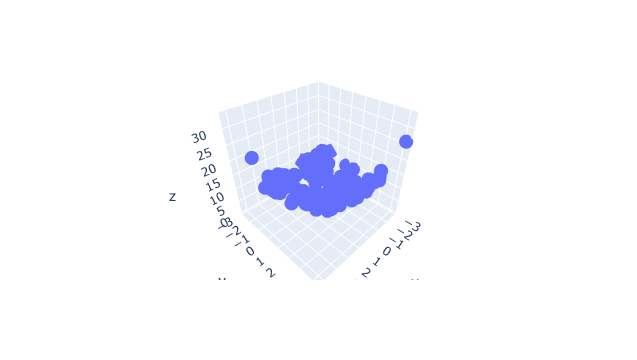

In [39]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

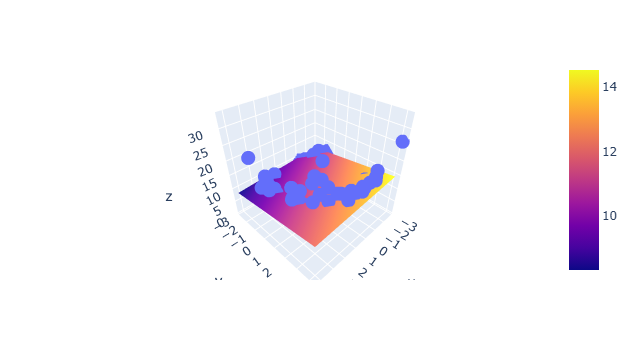

In [40]:

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)


import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [41]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [42]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [45]:
X_multi_trans.shape

(100, 496)

In [46]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

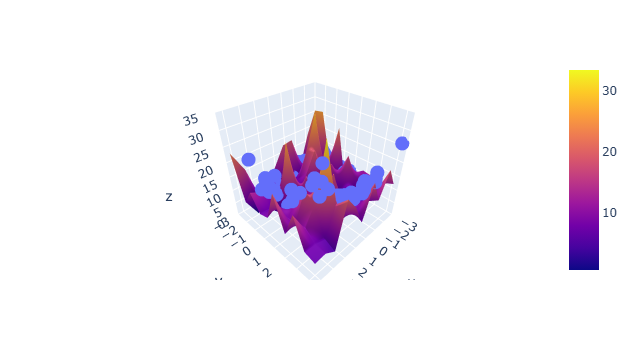

In [47]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

In [48]:
#polynomial degree 30, tries to reduce bias too much, increase in variance

In [49]:
#overfitting